### An example showing the plot_calibration_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `calibration_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_calibration_curve` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp
sp.__version__

'0.3.9rc4'

In [2]:
# Load the data
X, y = make_classification(
    n_samples=100000, 
    n_features=20,
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=0
)
X_train, y_train, X_val, y_val = X[:1000], y[:1000], X[1000:], y[1000:]

In [3]:
# Create an instance of the LogisticRegression
lr_probas = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train).predict_proba(X_val)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_val)
svc_scores = LinearSVC().fit(X_train, y_train).decision_function(X_val)
svc_isotonic = CalibratedClassifierCV(LinearSVC(), cv=2, method="isotonic").fit(X_train, y_train).predict_proba(X_val)
svc_sigmoid = CalibratedClassifierCV(LinearSVC(), cv=2, method="sigmoid").fit(X_train, y_train).predict_proba(X_val)
rf_probas = RandomForestClassifier(random_state=0).fit(X_train, y_train).predict_proba(X_val)

TypeError: plot_calibration() missing 1 required positional argument: 'y_probas_is_decision'

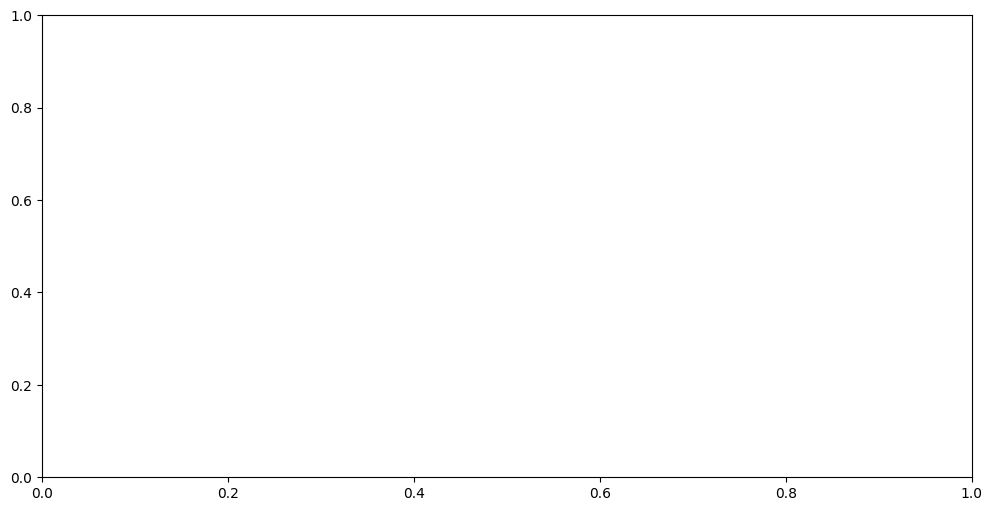

In [4]:
probas_dict = {
    LogisticRegression(): lr_probas,
    # GaussianNB(): nb_probas,
    "LinearSVC() + MinMax": svc_scores,
    "LinearSVC() + Isotonic": svc_isotonic,
    "LinearSVC() + Sigmoid": svc_sigmoid,
    # RandomForestClassifier(): rf_probas,
}
# Plot!
fig, ax = plt.subplots(figsize=(12, 6))
ax = sp.metrics.plot_calibration(
    y_val,
    y_probas_list=probas_dict.values(),
    estimator_names=probas_dict.keys(),
    ax=ax,
);

In [8]:
# Load the data
X, y = make_classification(
    n_samples=100000, 
    n_features=20,
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=0
)
X_train, y_train, X_val, y_val = X[:1000], y[:1000], X[1000:], y[1000:]

In [9]:
# Create an instance of the LogisticRegression
lr_probas = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train).predict_proba(X_val)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_val)
svc_scores = LinearSVC().fit(X_train, y_train).decision_function(X_val)
svc_isotonic = CalibratedClassifierCV(LinearSVC(), cv=2, method="isotonic").fit(X_train, y_train).predict_proba(X_val)
svc_sigmoid = CalibratedClassifierCV(LinearSVC(), cv=2, method="sigmoid").fit(X_train, y_train).predict_proba(X_val)
rf_probas = RandomForestClassifier(random_state=0).fit(X_train, y_train).predict_proba(X_val)

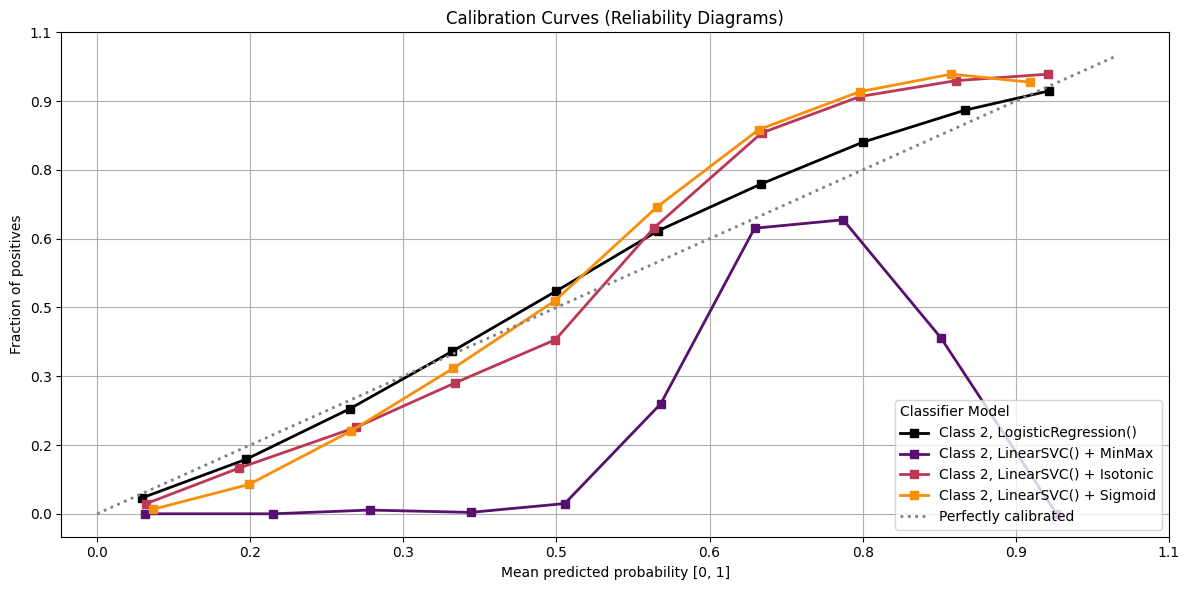

In [10]:
probas_dict = {
    LogisticRegression(): lr_probas,
    # GaussianNB(): nb_probas,
    "LinearSVC() + MinMax": svc_scores,
    "LinearSVC() + Isotonic": svc_isotonic,
    "LinearSVC() + Sigmoid": svc_sigmoid,
    # RandomForestClassifier(): rf_probas,
}
# Plot!
fig, ax = plt.subplots(figsize=(12, 6))
ax = sp.metrics.plot_calibration(
    y_val,
    y_probas_list=probas_dict.values(),
    estimator_names=probas_dict.keys(),
    to_plot_class_index=[2],
    ax=ax,
);